# DECISION TREES

#### a decision tree is a model that looks like flow chart, it break downs data into smaller pieces based on decision rules 

#### why use decision trees?

| Pros | Cons |
|------|------|
| easy to understand | can overfit on small data | 
| no need to scale features | not great with noisy data |
| works with both numbers and text | decision boundaries are axis aligned |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
df = sns.load_dataset("titanic")
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

#### select only relevant columns and drop rows with missing data

In [3]:
df = df[["survived","pclass","sex","age","fare","embarked"]]
df = df.dropna()

In [4]:
print(df)

     survived  pclass     sex   age     fare embarked
0           0       3    male  22.0   7.2500        S
1           1       1  female  38.0  71.2833        C
2           1       3  female  26.0   7.9250        S
3           1       1  female  35.0  53.1000        S
4           0       3    male  35.0   8.0500        S
..        ...     ...     ...   ...      ...      ...
885         0       3  female  39.0  29.1250        Q
886         0       2    male  27.0  13.0000        S
887         1       1  female  19.0  30.0000        S
889         1       1    male  26.0  30.0000        C
890         0       3    male  32.0   7.7500        Q

[712 rows x 6 columns]


#### convert sex and embarked columns to numbers

In [5]:
le_sex = LabelEncoder()
df["sex"] = le_sex.fit_transform(df["sex"])
le_embarked = LabelEncoder()
df["embarked"] = le_embarked.fit_transform(df["embarked"])

#### define input features(X) and output(y)

In [6]:
X = df[["pclass","sex","age","fare","embarked"]]
y = df["survived"]
print(X)
print(y)

     pclass  sex   age     fare  embarked
0         3    1  22.0   7.2500         2
1         1    0  38.0  71.2833         0
2         3    0  26.0   7.9250         2
3         1    0  35.0  53.1000         2
4         3    1  35.0   8.0500         2
..      ...  ...   ...      ...       ...
885       3    0  39.0  29.1250         1
886       2    1  27.0  13.0000         2
887       1    0  19.0  30.0000         2
889       1    1  26.0  30.0000         0
890       3    1  32.0   7.7500         1

[712 rows x 5 columns]
0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 712, dtype: int64


#### split data: 80% for training, 20% for testing

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8, random_state = 42)

#### initialize and train the decision tree model

In [8]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### predict and evaluate 

In [9]:
y_pred = dt_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7280701754385965


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       341
           1       0.65      0.69      0.67       229

    accuracy                           0.73       570
   macro avg       0.72      0.72      0.72       570
weighted avg       0.73      0.73      0.73       570



In [11]:
print(confusion_matrix(y_test, y_pred))

[[256  85]
 [ 70 159]]


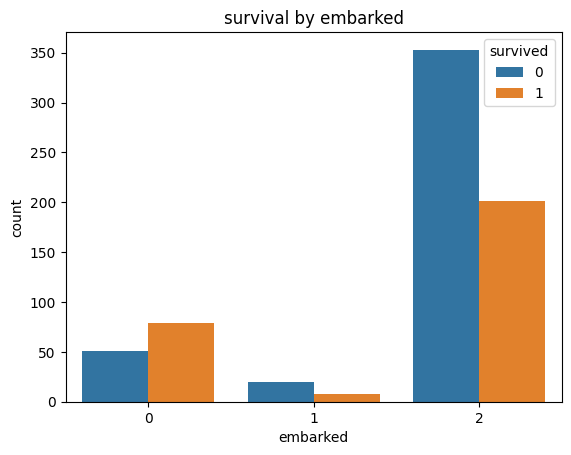

In [13]:
sns.countplot(x = "embarked", hue = "survived", data = df)
plt.title("survival by embarked")
plt.show()